In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data.csv")
data.dtypes

country                            object
country_code                       object
year_week                          object
source                             object
new_cases                           int64
number_sequenced                    int64
percent_cases_sequenced           float64
valid_denominator                    bool
variant                            object
number_detections_variant           int64
number_sequenced_known_variant    float64
percent_variant                   float64
dtype: object

In [3]:
x = data.drop(["country","country_code","year_week","source","valid_denominator","variant"], axis=1)

In [4]:
print(x.isnull().sum())

new_cases                            0
number_sequenced                     0
percent_cases_sequenced           1816
number_detections_variant            0
number_sequenced_known_variant    3774
percent_variant                   8259
dtype: int64


In [5]:
updated_x = x
updated_x['percent_cases_sequenced']=updated_x['percent_cases_sequenced'].fillna(updated_x['percent_cases_sequenced'].mean())
updated_x['number_sequenced_known_variant']=updated_x['number_sequenced_known_variant'].fillna(updated_x['number_sequenced_known_variant'].mean())
updated_x['percent_variant']=updated_x['percent_variant'].fillna(updated_x['percent_variant'].mean())
print(updated_x.isnull().sum())

new_cases                         0
number_sequenced                  0
percent_cases_sequenced           0
number_detections_variant         0
number_sequenced_known_variant    0
percent_variant                   0
dtype: int64


Text(0, 0.5, 'WCSS')

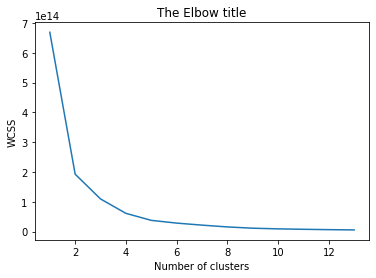

In [8]:
wcss=[]
for i in range(1,14):
    kmeans = KMeans(i)
    kmeans.fit(updated_x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,14)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [9]:
kmeans = KMeans(2)
kmeans.fit(updated_x)

KMeans(n_clusters=2)

In [10]:
identified_clusters = kmeans.fit_predict(updated_x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

(0.0, 2606300.55)

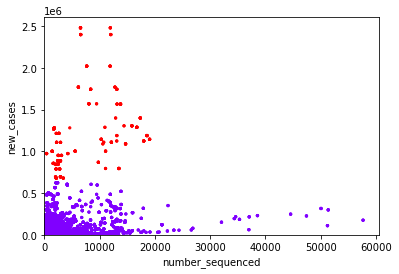

In [11]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters ['number_sequenced'],data_with_clusters ['new_cases'],c=data_with_clusters['Clusters'],cmap='rainbow', s=5)
plt.xlabel('number_sequenced')
plt.ylabel('new_cases')
plt.xlim(0,None)
plt.ylim(0, None)

In [17]:
pre_final = data_with_clusters[["country","Clusters"]]
pre_final.head()

,country,Clusters
0,Austria,0
1,Austria,0
2,Austria,0
3,Austria,0
4,Austria,0


In [30]:
final = pre_final.drop_duplicates()
final = final.reset_index()
final

,index,country,Clusters
0,0,Austria,0
1,1141,Belgium,0
2,2176,Bulgaria,0
3,3166,Croatia,0
4,4146,Cyprus,0
5,5086,Czechia,0
6,6127,Denmark,0
7,7093,Estonia,0
8,8152,Finland,0
9,9251,France,0
